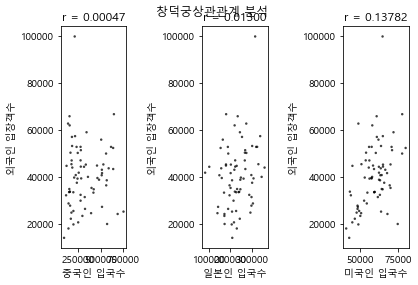

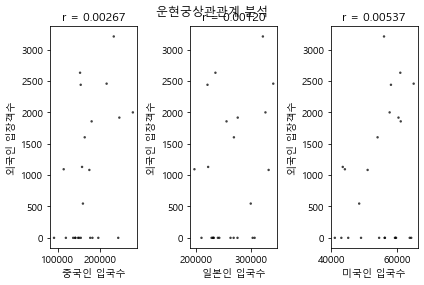

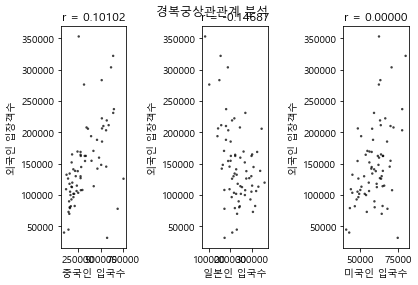

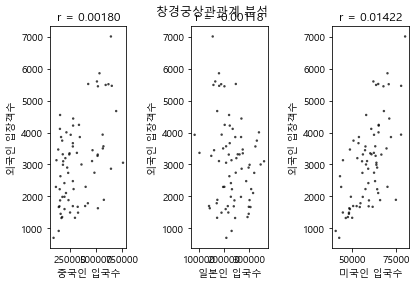

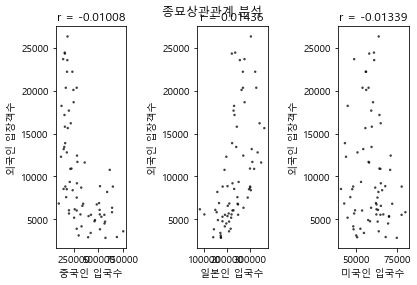

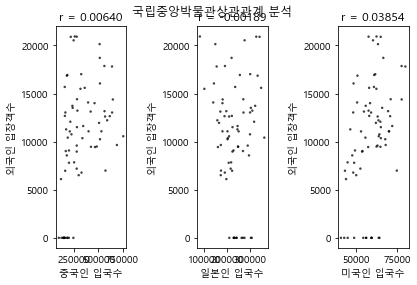

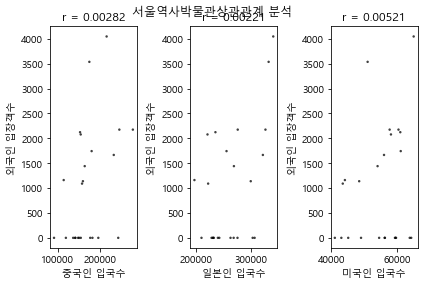

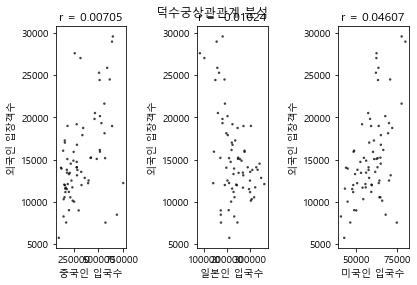

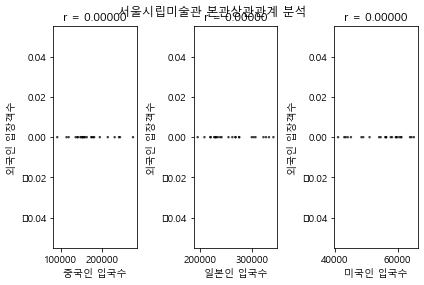

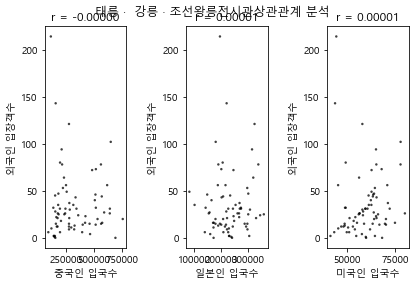

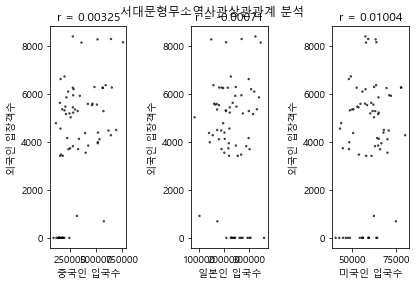

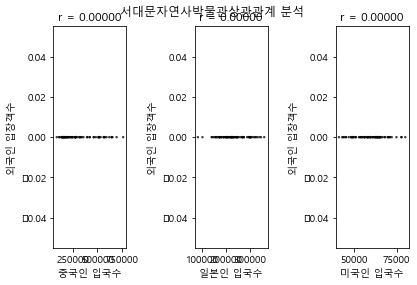

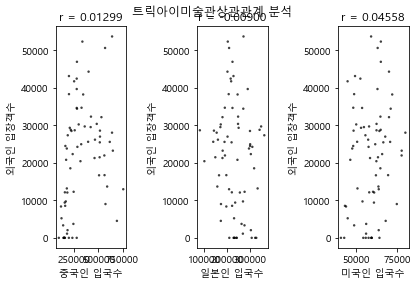

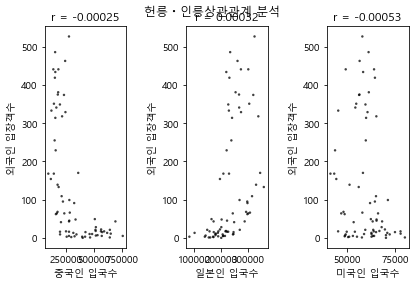

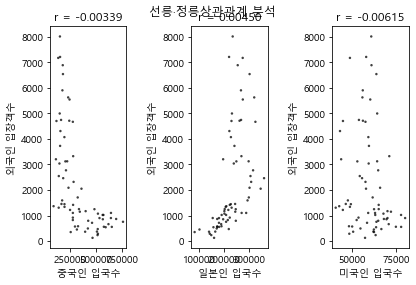

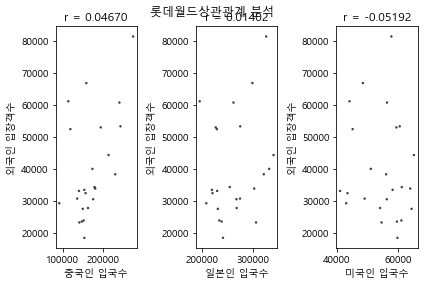

In [1]:
# 데이터 상관관계 분석
import json
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# 데이터 상관관계를 계산하는 예시
def correlation(x, y):
    n = len(x)
    vals = range(n)

    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0

    for i in vals:
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow + pow(float(x[i]), 2)

    try:
        r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt(((n * x_sum_pow) - pow(x_sum, 2)) * ((n * y_sum_pow) - pow(y_sum, 2)) )
    except:
        r = 0.0

    return r


# Scatter 모양으로 그래프 설정
def setScatterGraph(tour_table, visit_table, tourpoint):
    tour = tour_table[tour_table['resNm'] == tourpoint]
    merge_table = pd.merge(tour, visit_table, left_index=True, right_index=True)
    fig = plt.figure()
    fig.suptitle(tourpoint + '상관관계 분석',)
    
    # 중국인 방문자 출력칸
    plt.subplot(1, 3, 1)
    plt.xlabel('중국인 입국수')
    plt.ylabel('외국인 입장객수')
    r = correlation(list(merge_table['china']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r))
    plt.scatter(list(merge_table['china']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    # 일본인 방문자 출력칸
    plt.subplot(1, 3, 2)
    plt.xlabel('일본인 입국수')
    plt.ylabel('외국인 입장객수')
    r = correlation(list(merge_table['japan']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r))
    plt.scatter(list(merge_table['japan']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    # 미국인 방문자 출력칸
    plt.subplot(1, 3, 3)
    plt.xlabel('미국인 입국수')
    plt.ylabel('외국인 입장객수')
    r = correlation(list(merge_table['usa']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r))
    plt.scatter(list(merge_table['usa']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.tight_layout()

    plt.show()


# matplotlib에서 한글폰트를 사용할 수 있도록 함수 설정
def setHangulFont(fontFileName = 'c:/Windows/fonts/malgun.ttf'):
    # 화면에 한글을 표시하기 위해 Malgun 폰트 설정
    font_location = fontFileName
    # font_manager로부터 한글의 이름을 읽어옵니다.
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)


# 매개변수 없음
def main():
    #setHangul() 함수를 호출 한글 적용, 꼭 맨위에 적을필요는 없지만 데이터 처리 전 적용해준다.
    setHangulFont()

    # 서울 관광지 정보를 분석
    tpFileName = '../data/json/서울특별시_관광지입장정보_2011_2016.json'
    jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
    tour_table = pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
    tour_table = tour_table.set_index('yyyymm')
    
    resNm = tour_table.resNm.unique()
    
    # 중국인 방문자 수 분석
    fv_CFileName = '../data/json/중국(112)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
    china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    china_table = china_table.rename(columns={'visit_cnt' : 'china'})
    china_table = china_table.set_index('yyyymm')

    # 일본인 방문자 수 분석
    fv_JFileName = '../data/json/일본(130)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
    japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    japan_table = japan_table.rename(columns={'visit_cnt' : 'japan'})
    japan_table = japan_table.set_index('yyyymm')

    # 미국인 방문자 수 분석
    fv_UFileName = '../data/json/미국(275)_해외방문객정보_2011_2016.json' 
    jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
    usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    usa_table = usa_table.rename(columns={"visit_cnt" : "usa"})
    usa_table = usa_table.set_index('yyyymm')

    # merge() 함수 두개의 데이터 프레임을 병합
    # 중국인, 일본인 방문자 객체를 병합(결과 : 중국인, 일본인)
    fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
    # 위에 코드에서 병합한 객체에 미국인 방문자 객체를 추가로 병합(결과 : 중국인, 일본인, 미국인)
    fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)

    # setScatterGraph() 함수를 호출하여 for문으로 데이터 객체 전체를 그래프로 만들기 
    for tourpoint in resNm:
        setScatterGraph(tour_table, fv_table, tourpoint)
           

# main() 함수를 실핼할때 모듈과 출돌 방지
if __name__ == "__main__":
    main()